In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import warnings
import sys

sys.path.append("..")
warnings.filterwarnings("ignore")

import os
import torch
import numpy as np
from src.model import GPT
from src.utils import load_decompositions

seed = 1234
proj_dir = "../out"
topics_dir = "../out-topics/"

### Reproduce Figure 1

Layer progress: 100%|██████████| 12/12 [00:01<00:00,  6.97it/s]


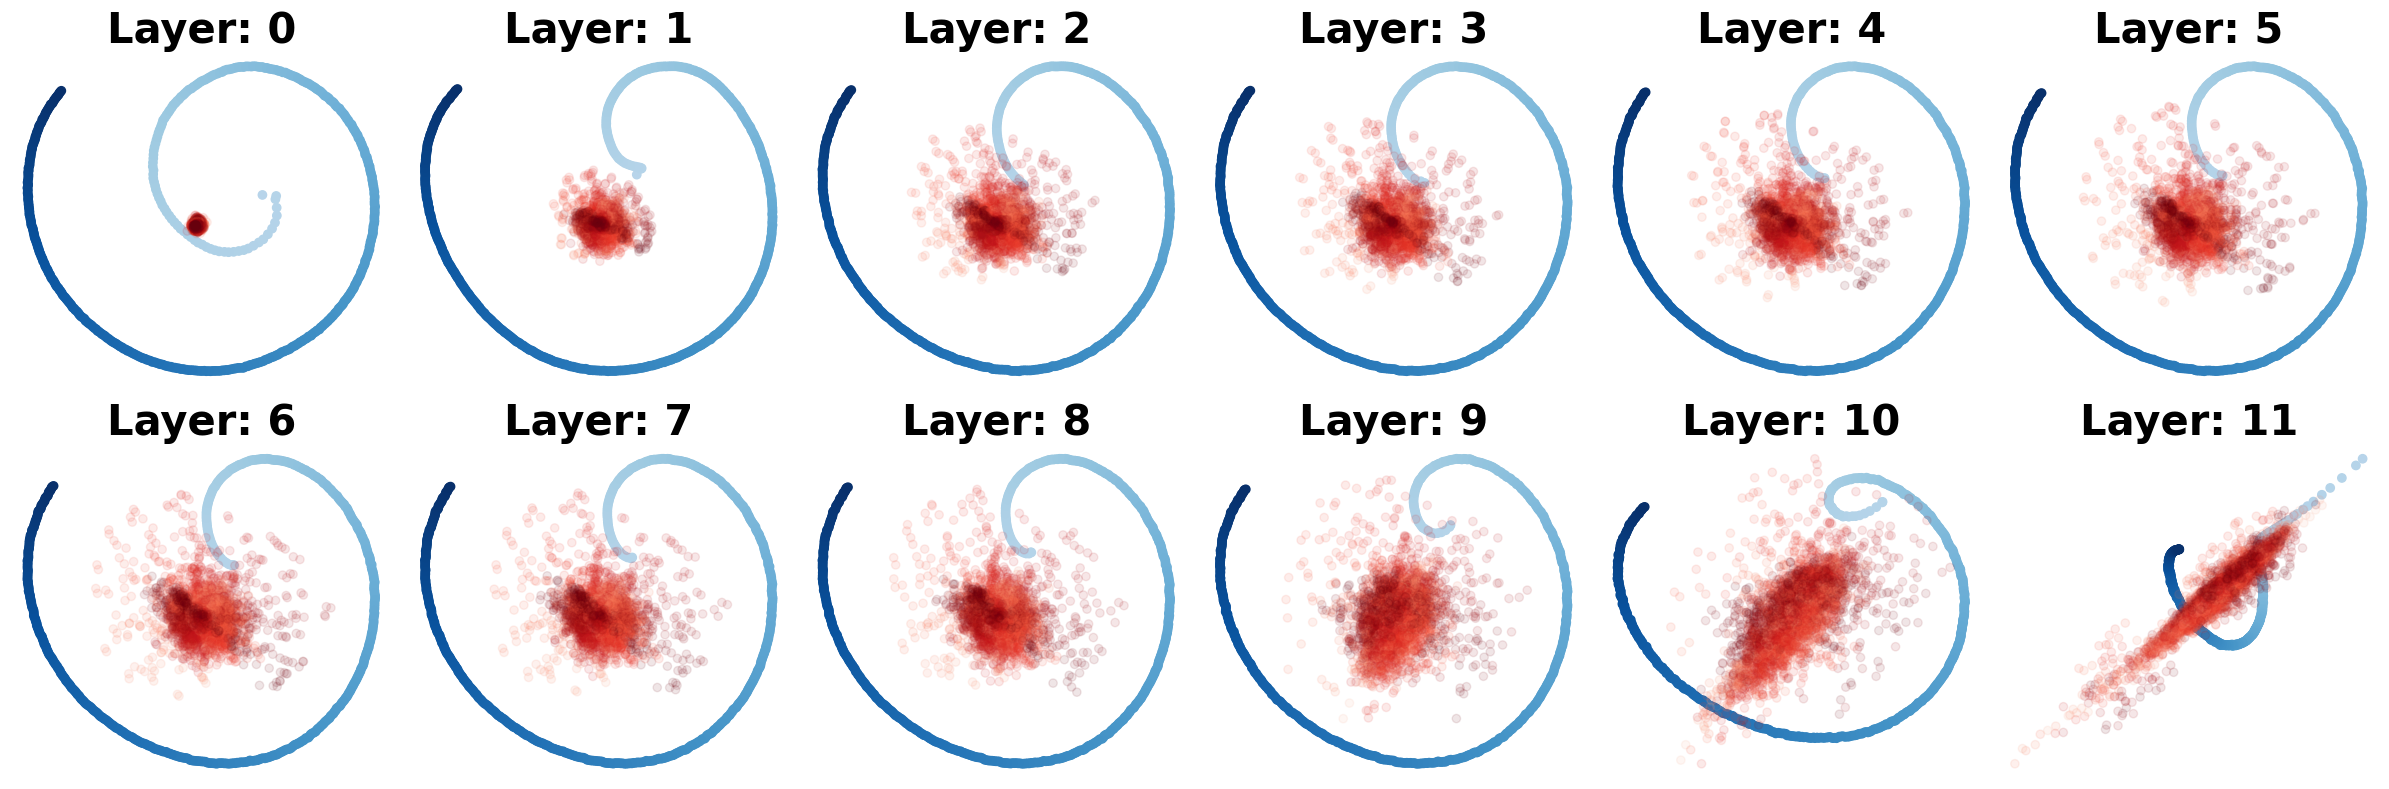

In [3]:
from src.utils import visz_pca_pos_cvec

dataset = "openwebtext"
model = "gpt2"
pos, cvec, global_mean = load_decompositions.load_pos_cvec_global_mean(
    dataset,
    model,
    proj_dir,
)
visz_pca_pos_cvec.plot(pos, cvec, plot_context=True)

### Reproduce Figure 2

Layer progress: 100%|██████████| 12/12 [00:01<00:00,  6.54it/s]


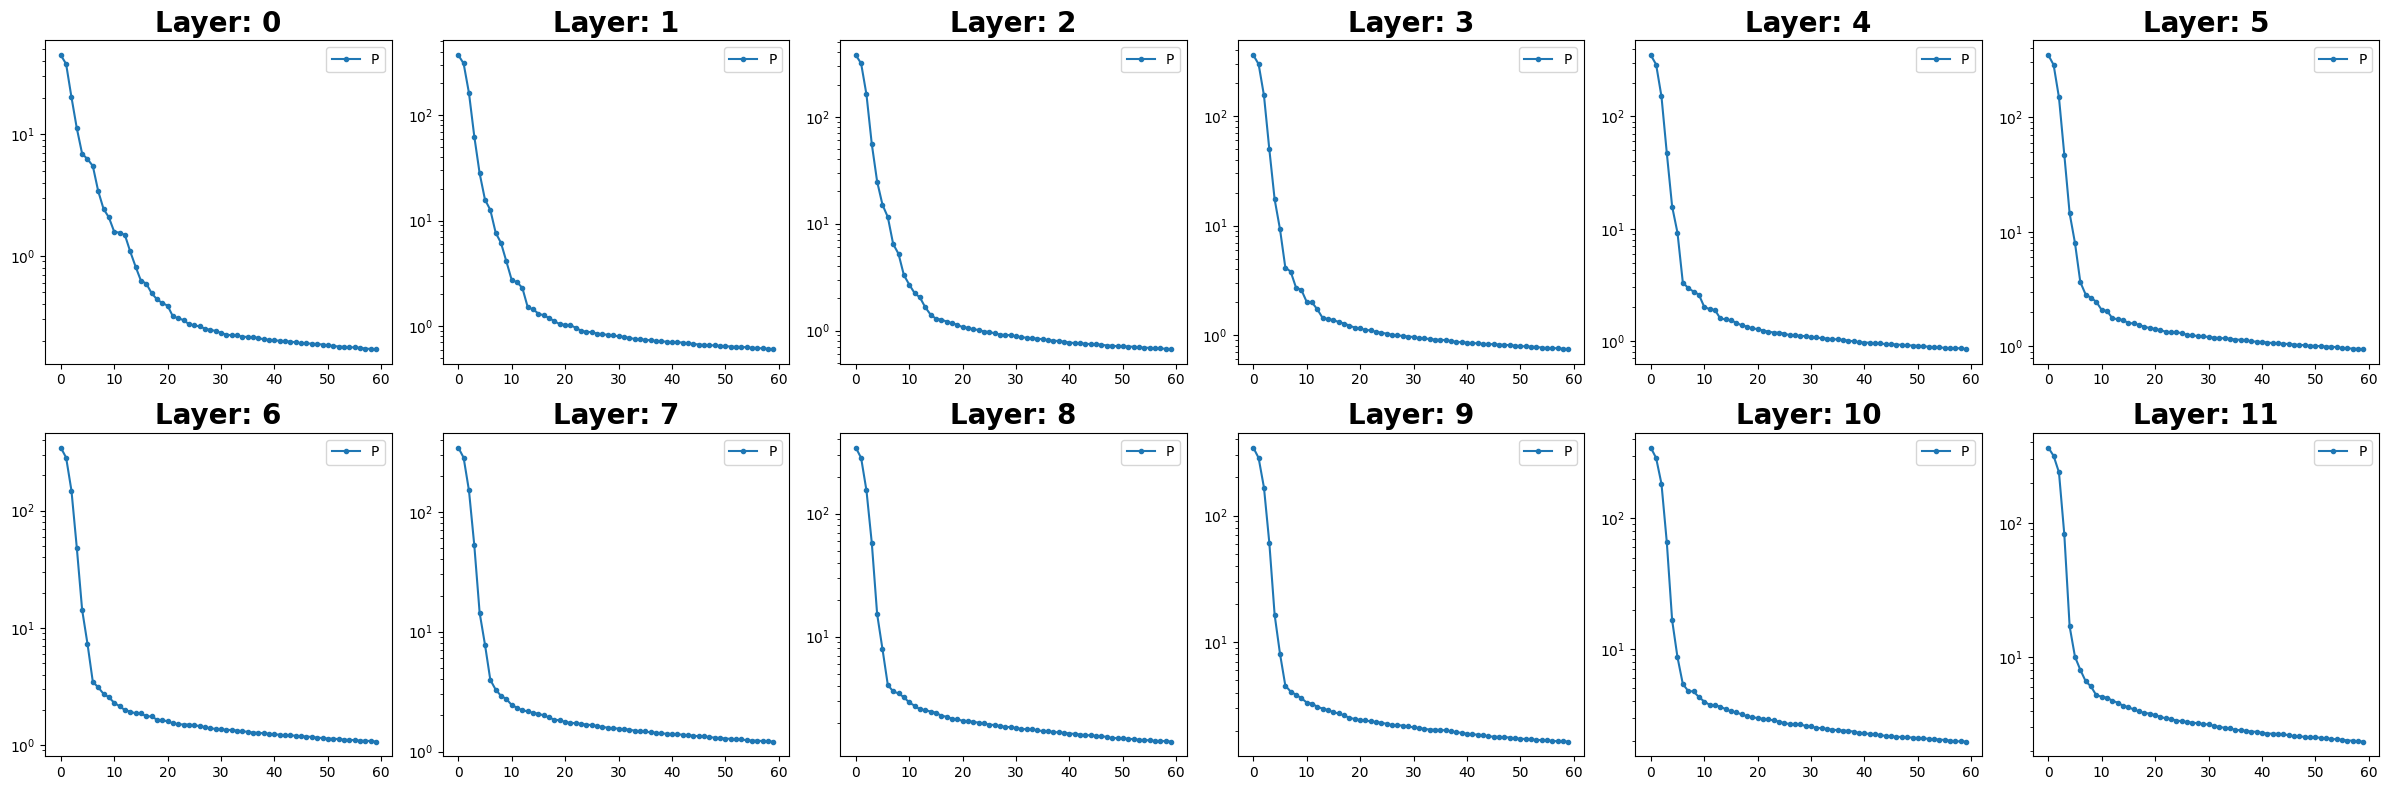

In [4]:
# Left
from src.utils import visz_svals_pos

dataset = "openwebtext"
model = "gpt2"
pos, cvec, resid = load_decompositions.load_pos_cvec_resid(dataset, model, proj_dir)
visz_svals_pos.plot(pos, cvec, resid, only_pos=True)

Layer Progress`: 100%|██████████| 12/12 [00:03<00:00,  4.00it/s]


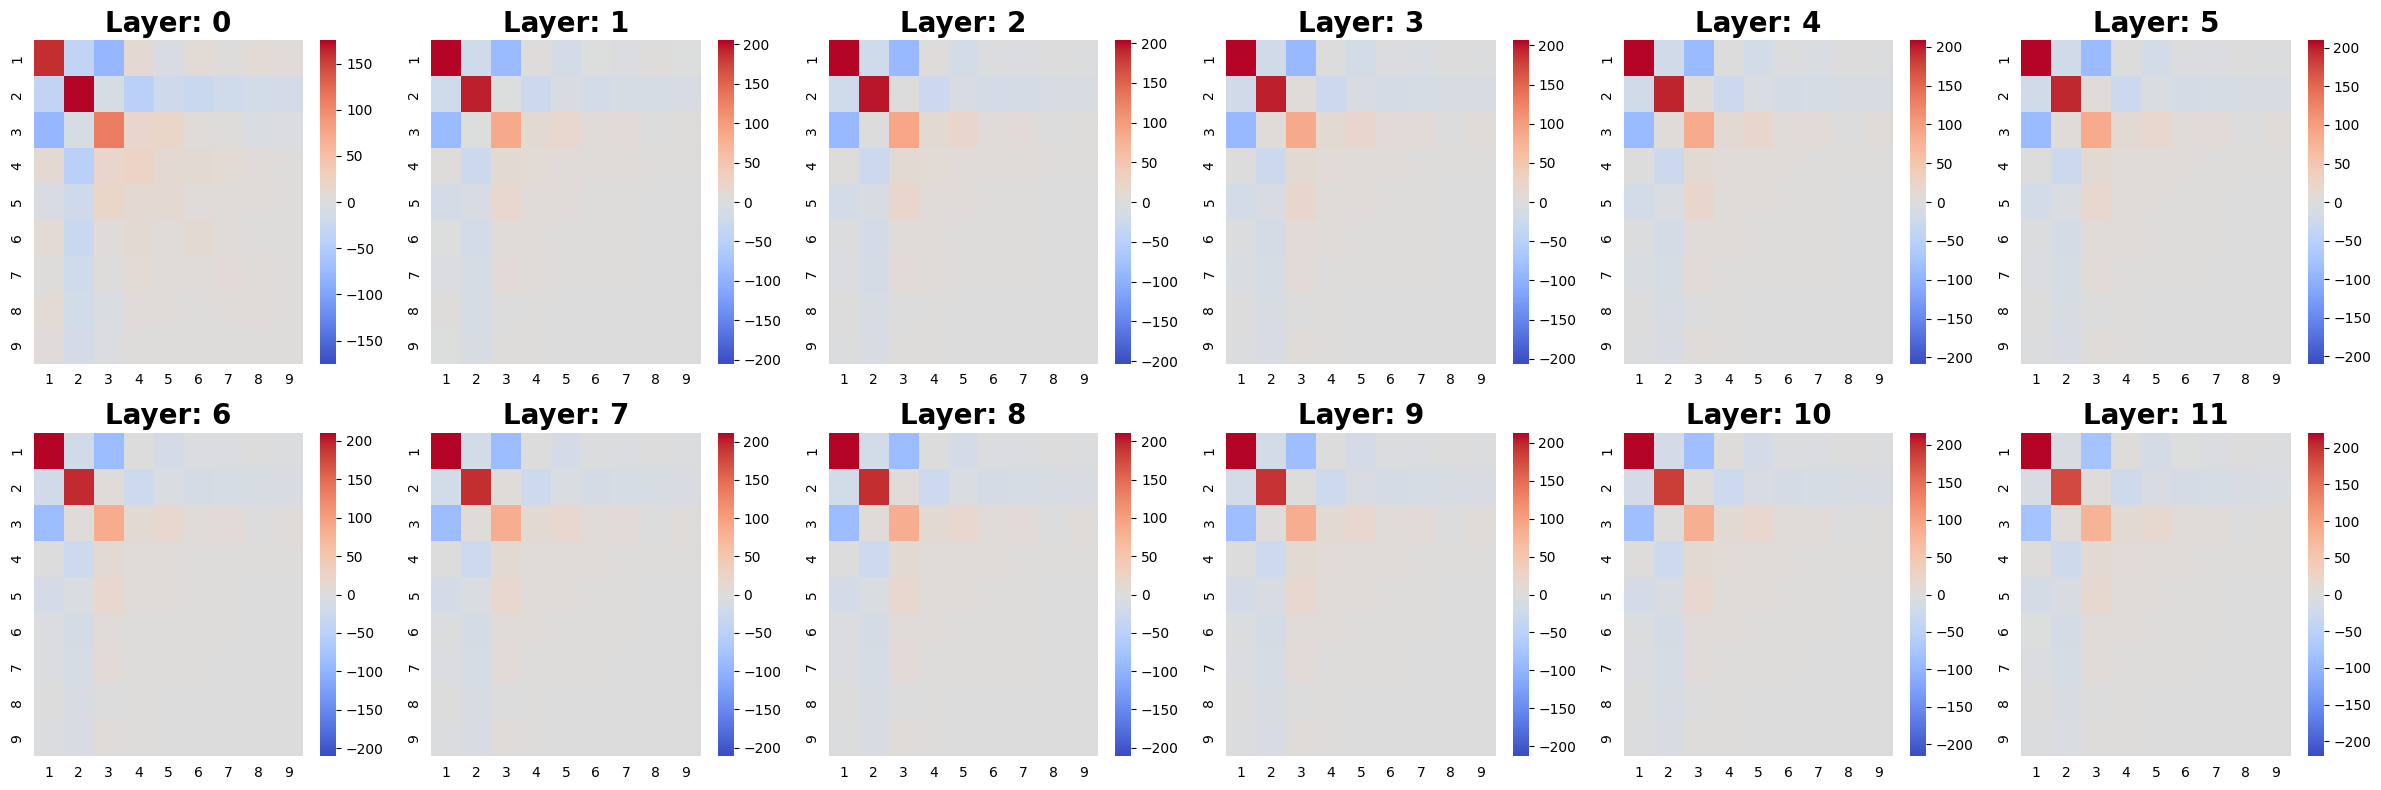

In [5]:
# right
from src.utils import visz_fourier_pos

dataset = "openwebtext"
model = "gpt2"
pos, cvec, resid = load_decompositions.load_pos_cvec_resid(dataset, model, proj_dir)
visz_fourier_pos.plot(pos)

### Reproduce Figure 3

Layer Progress: 100%|██████████| 12/12 [00:04<00:00,  2.98it/s]


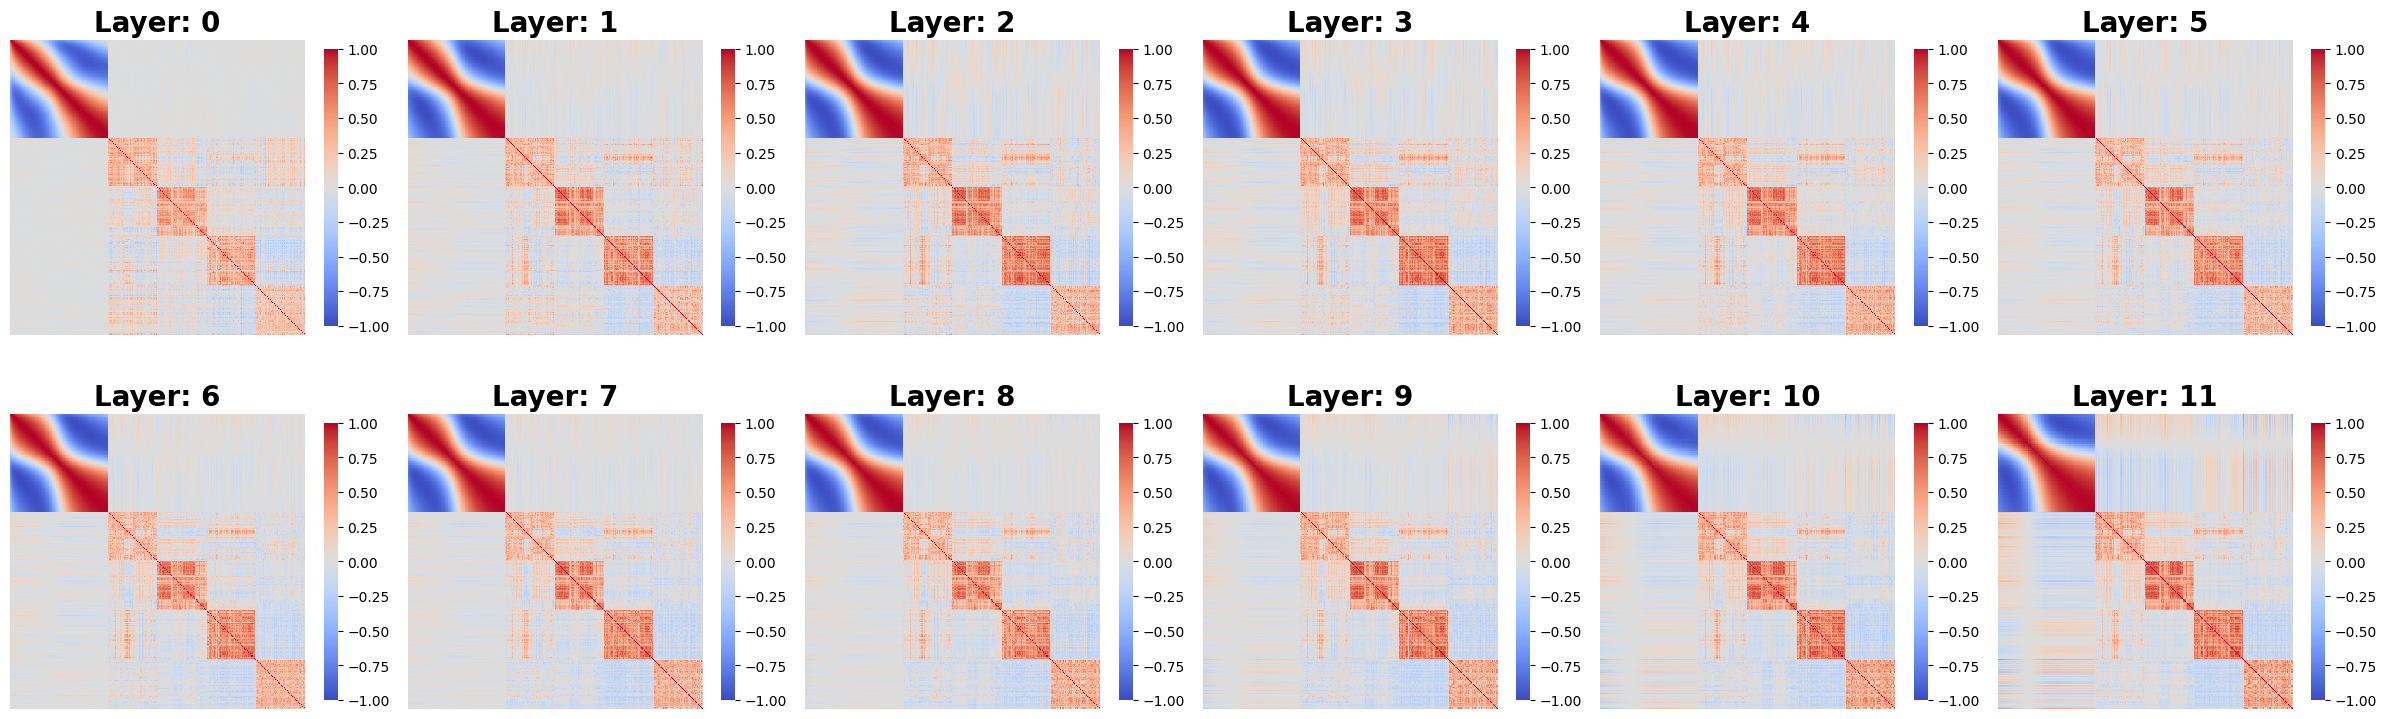

In [5]:
from src.utils import visz_gram_pos_cbasis
import matplotlib.pyplot as plt

dataset = "openwebtext_topics"
model = "gpt2"
save_dir = os.path.join(topics_dir, f"{dataset}-{model}")
pos = np.load(os.path.join(save_dir, f"pos_id1-128_{model}.npy"))
L, T, C = pos.shape
cbasis = np.memmap(
    os.path.join(save_dir, f"cbasis_id1-128_{model}.npy"),
    dtype=np.float32,
    mode="r",
    shape=(L, 4 * 64, C),
)
visz_gram_pos_cbasis.plot(pos, cbasis)

### Reproduce Figure 4

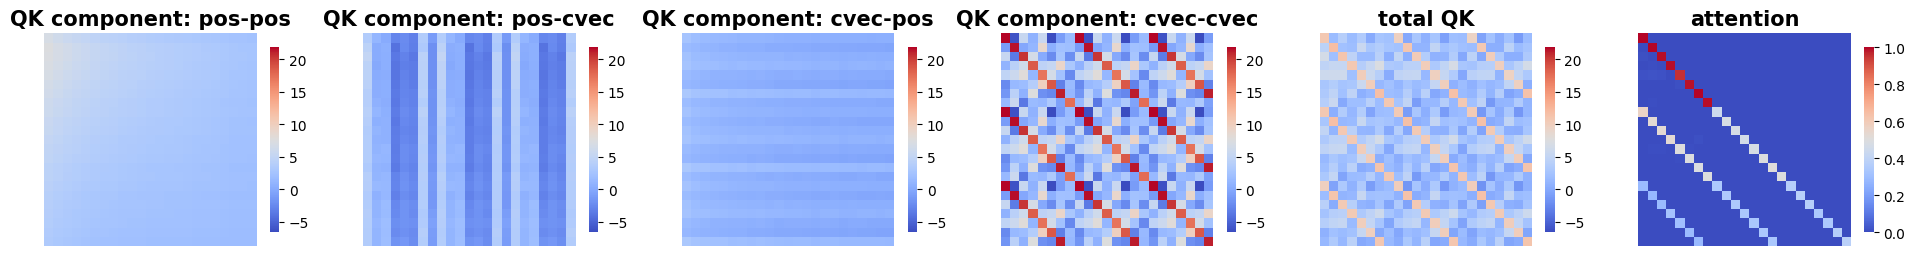

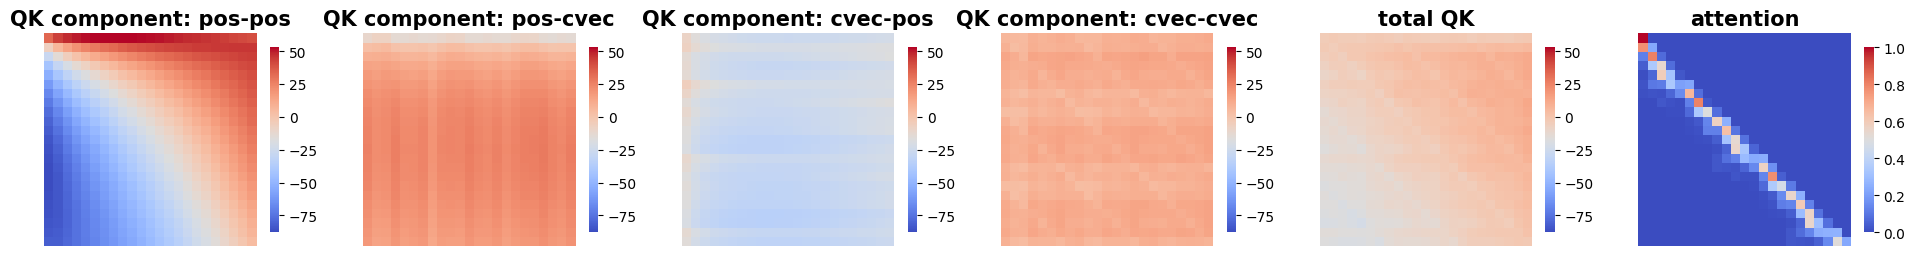

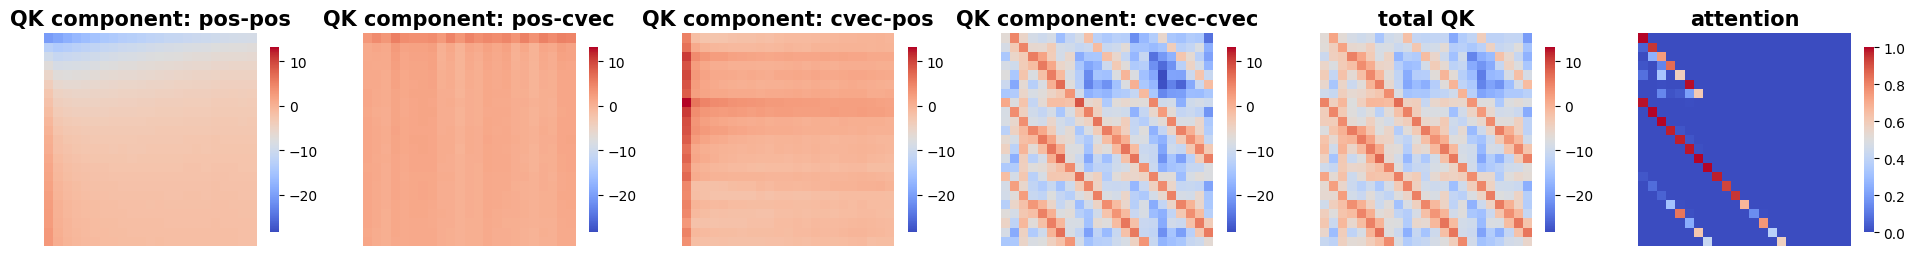

In [7]:
from src.utils import visz_dissect_qk_attention

torch.manual_seed(1234)
model = GPT.from_pretrained("gpt2")

dataset = "openwebtext"
model_str = "gpt2"
pos, cvec, global_mean = load_decompositions.load_pos_cvec_global_mean(
    dataset,
    model_str,
    proj_dir,
)

torch.random.manual_seed(seed)
ids = torch.randint(1000, 10000, (8,))
ids = ids.repeat(3).unsqueeze(0)

QKs = visz_dissect_qk_attention.dissect_attentions(ids, model, pos, global_mean)
for layer, head in [
    (0, 1),
    (2, 2),
    (5, 1),
]:
    visz_dissect_qk_attention.plot(QKs, layer, head)

### Reproduce Figure 5


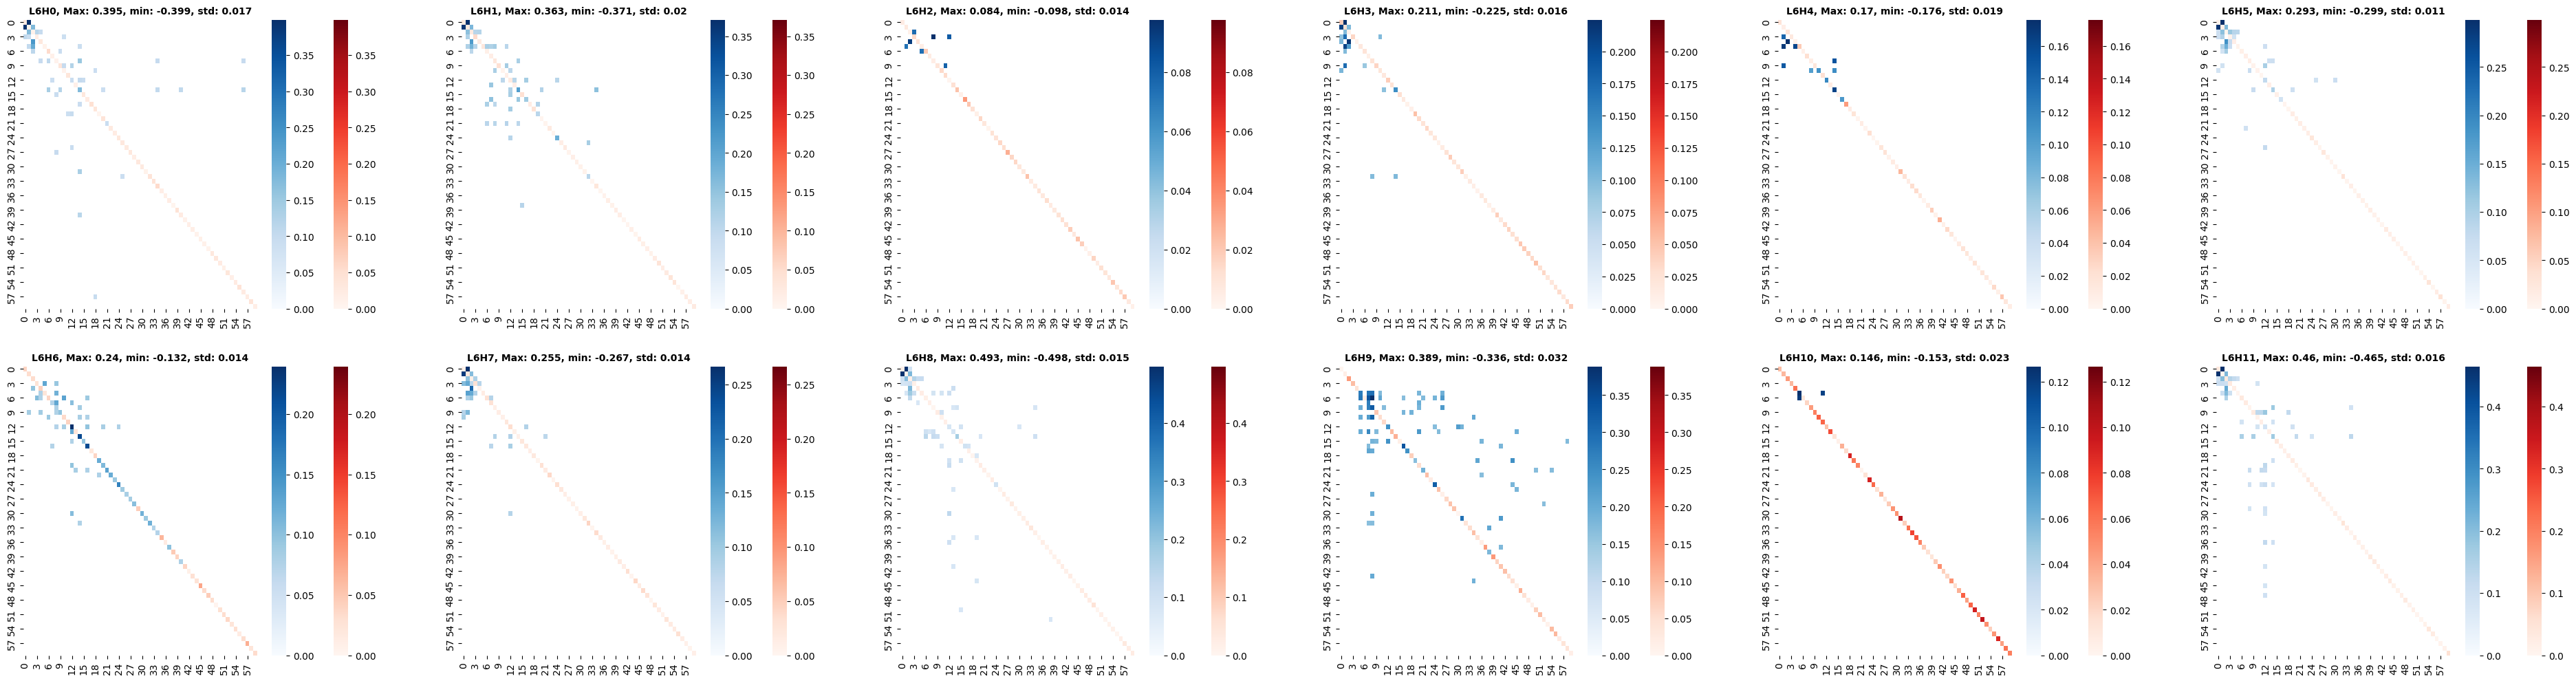

In [8]:
from src.utils import visz_att_weights_gpt2

dataset = "openwebtext"
model = "gpt2"
pos = load_decompositions.load_pos(dataset, model, proj_dir)
visz_att_weights_gpt2.plot(layer_idx=6, pos=pos)